## Plot Solutions to Time-Independent Schrodinger Equation

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.special import hermite

In [2]:
def read_eigen_file(filename):
    with open(filename) as f:
        data = f.readlines()

    # read number of discretization points
    npoints = int(data[0].split()[2])

    # get the x grid
    x_grid = np.array(data[1].split()[3:], dtype=float)
    
    # get eigenvalues and eigenvectors
    eigenvalues = np.zeros(npoints)
    eigenvectors = np.zeros((npoints, npoints))

    idx = 2
    for i in range(npoints):
        eigenvalues[i] = float(data[idx].split()[2])
        eigenvectors[i] = np.array(data[idx + 2].split(), dtype=float)
        idx += 3  # skip three rows

    return npoints, x_grid, eigenvalues, eigenvectors

In [3]:
def wavefunc(n, x):
    coeff = 1 / (np.sqrt(2 ** n * math.factorial(n)) * np.pi ** (1/4))
    return coeff * np.exp(-x ** 2 / 2) * hermite(n)(x)

In [4]:
def energies(n):
    return n + 0.5

In [5]:
plot_dir = f"..{os.sep}plots"

## Load data

In [6]:
N = 1000
xmax = 10

In [7]:
output_filename = f"..{os.sep}data{os.sep}solution_{N}_{xmax}.txt"

In [8]:
npoints, x_grid, eigenvalues, eigenvectors = read_eigen_file(output_filename)

## Eigenfunction 1

In [9]:
wavefunc_0 = wavefunc(0, x_grid)
wavefunc_0 /= np.linalg.norm(wavefunc_0)  # normalize

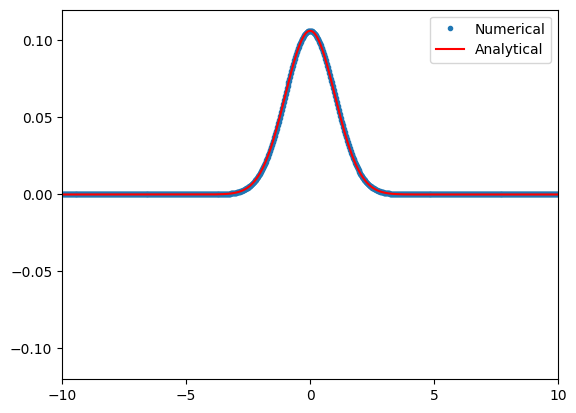

In [10]:
plt.plot(x_grid, eigenvectors[:, 0], '.', label="Numerical")
plt.plot(x_grid, wavefunc_0, 'r', label="Analytical")
plt.xlim([x_grid[0], x_grid[-1]])
plt.ylim([-0.12, 0.12])
plt.xticks([-10, -5, 0, 5, 10])
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}eigenfunction_1.pdf", format="pdf", bbox_inches="tight")

In [11]:
print("Energy is", eigenvalues[0])

Energy is 0.49998747464744236


In [12]:
print("Norm is", np.linalg.norm(eigenvectors[1:, 0]))

Norm is 1.0000000000000013


## Eigenfunction 2

In [13]:
wavefunc_1 = wavefunc(1, x_grid)
wavefunc_1 /= np.linalg.norm(wavefunc_1)

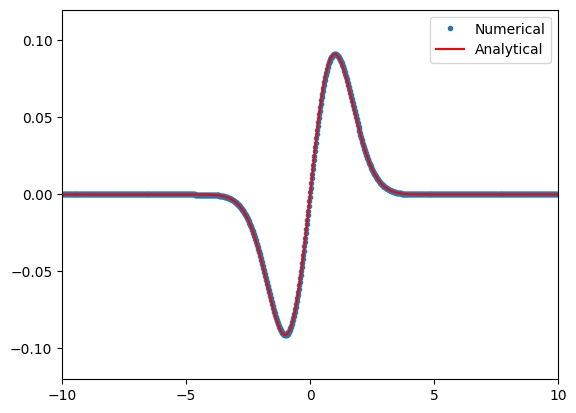

In [14]:
plt.plot(x_grid, eigenvectors[:, 1], '.', label="Numerical")
plt.plot(x_grid, wavefunc_1, 'r', label="Analytical")
plt.xlim([x_grid[0], x_grid[-1]])
plt.ylim([-0.12, 0.12])
plt.xticks([-10, -5, 0, 5, 10])
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}eigenfunction_2.pdf", format="pdf", bbox_inches="tight")

In [15]:
print("Energy is", eigenvalues[1])

Energy is 1.4999373719868916


In [16]:
print("Norm is", np.linalg.norm(eigenvectors[1:, 1]))

Norm is 1.0000000000000007


## Eigenfunction 3

In [17]:
wavefunc_2 = -wavefunc(2, x_grid)
wavefunc_2 /= np.linalg.norm(wavefunc_2)

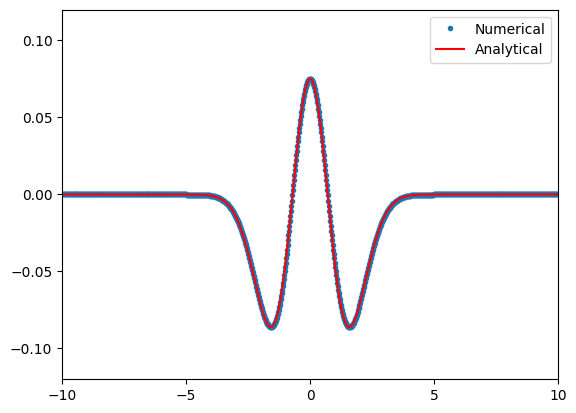

In [18]:
plt.plot(x_grid, eigenvectors[:, 2], '.', label="Numerical")
plt.plot(x_grid, wavefunc_2, 'r', label="Analytical")
plt.xlim([x_grid[0], x_grid[-1]])
plt.ylim([-0.12, 0.12])
plt.xticks([-10, -5, 0, 5, 10])
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}eigenfunction_3.pdf", format="pdf", bbox_inches="tight")

In [19]:
print("Energy is", eigenvalues[2])

Energy is 2.4998371635275367


In [20]:
print("Norm is", np.linalg.norm(eigenvectors[1:, 2]))

Norm is 1.0000000000000002


## Eigenfunction 4

In [21]:
wavefunc_3 = -wavefunc(3, x_grid)
wavefunc_3 /= np.linalg.norm(wavefunc_3)

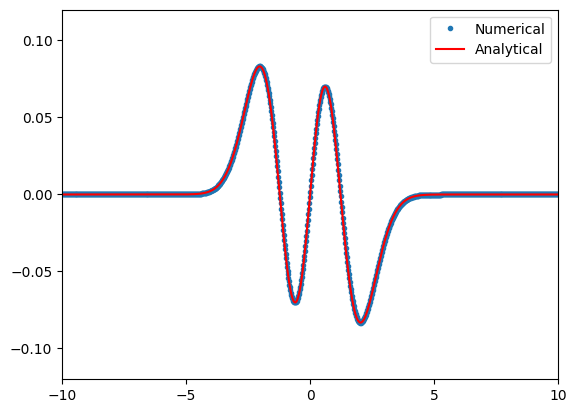

In [22]:
plt.plot(x_grid, eigenvectors[:, 3], '.', label="Numerical")
plt.plot(x_grid, wavefunc_3, 'r', label="Analytical")
plt.xlim([x_grid[0], x_grid[-1]])
plt.ylim([-0.12, 0.12])
plt.xticks([-10, -5, 0, 5, 10])
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}eigenfunction_4.pdf", format="pdf", bbox_inches="tight")

In [23]:
print("Energy is", eigenvalues[3])

Energy is 3.4996868455025583


In [24]:
print("Norm is", np.linalg.norm(eigenvectors[1:, 3]))

Norm is 0.9999999999999999


## Eigenfunction 10

In [25]:
wavefunc_9 = -wavefunc(9, x_grid)
wavefunc_9 /= np.linalg.norm(wavefunc_9)

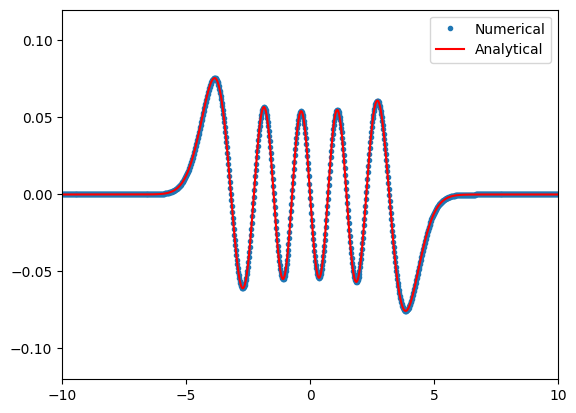

In [26]:
plt.plot(x_grid, eigenvectors[:, 9], '.', label="Numerical")
plt.plot(x_grid, wavefunc_9, 'r', label="Analytical")
plt.xlim([x_grid[0], x_grid[-1]])
plt.ylim([-0.12, 0.12])
plt.xticks([-10, -5, 0, 5, 10])
plt.legend();

## Eigenfunction 17

In [27]:
wavefunc_16 = -wavefunc(16, x_grid)
wavefunc_16 /= np.linalg.norm(wavefunc_16)

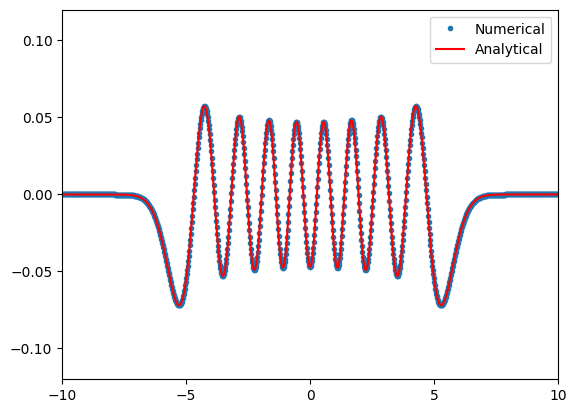

In [28]:
plt.plot(x_grid, eigenvectors[:, 16], '.', label="Numerical")
plt.plot(x_grid, wavefunc_16, 'r', label="Analytical")
plt.xlim([x_grid[0], x_grid[-1]])
plt.ylim([-0.12, 0.12])
plt.xticks([-10, -5, 0, 5, 10])
plt.legend();

## Plot Errors

In [29]:
abs_error_0 = np.abs(eigenvectors[:, 0] - wavefunc_0)
abs_error_9 = np.abs(eigenvectors[:, 9] - wavefunc_9)
abs_error_16 = np.abs(eigenvectors[:, 16] - wavefunc_16)

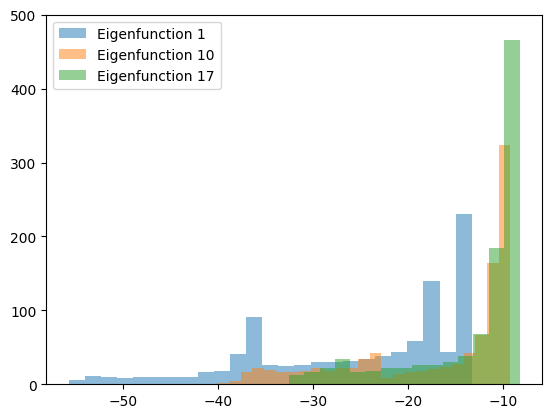

In [30]:
plt.hist(np.log(abs_error_0), bins=25, alpha=0.5, label="Eigenfunction 1")
plt.hist(np.log(abs_error_9), bins=25, alpha=0.5, label="Eigenfunction 10");
plt.hist(np.log(abs_error_16), bins=15, alpha=0.5, label="Eigenfunction 17")
plt.ylim([0, 500])
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}eigenfunction_error_hist.pdf", format="pdf", bbox_inches="tight")

## Plot Eigenvalues

In [31]:
n = np.arange(len(x_grid))

In [32]:
exact_energies = energies(n)

Plot the first six eigenvalues.

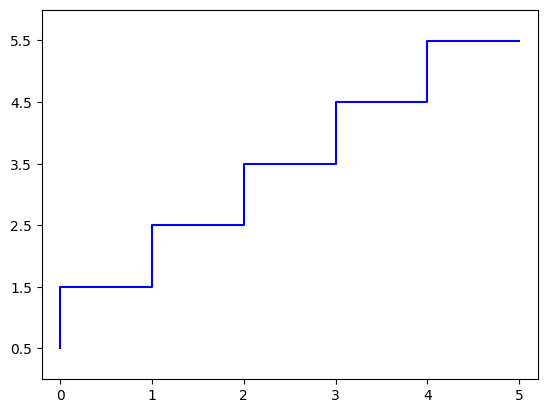

In [33]:
plt.step(n[:6], eigenvalues[:6], "b")
plt.xlim([-0.2, 5.2])
plt.ylim([0, 6])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
plt.savefig(f"{plot_dir}{os.sep}eigenvalues_6.pdf", format="pdf", bbox_inches="tight")

Plot the first 100.

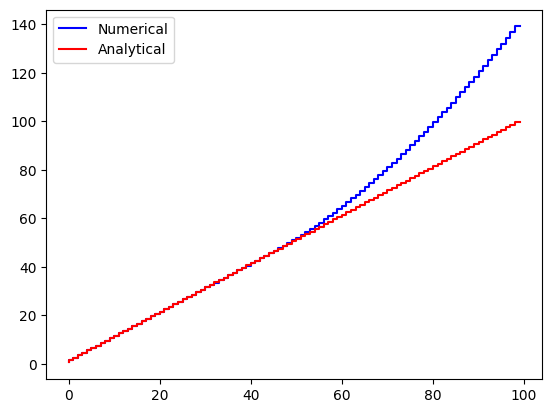

In [34]:
plt.step(n[:100], eigenvalues[:100], 'b', label="Numerical")
plt.step(n[:100], exact_energies[:100], 'r', label="Analytical")
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}eigenvalues_100.pdf", format="pdf", bbox_inches="tight")

Plot max absolute error.

In [35]:
abs_error_eigenvalues = np.abs((exact_energies - eigenvalues) / exact_energies)

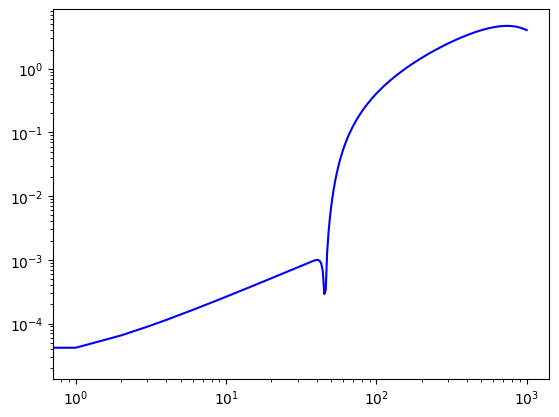

In [36]:
plt.loglog(n, abs_error_eigenvalues, 'b');